# Requirements

In [70]:
import itertools
import math
import matplotlib.pyplot as plt
%matplotlib inline
import time

# Problem setting

We choose 9 integers $a, b, \dots, i \in \{0, 1, \dots, 8, 9\}$ such that
* all integers are distinct,
* $ab$ is divisible by 2,
* $abc$ is divisible by 3,
* $abcd$ is divisible by 4,
* $abcde$ is divisible by 5,
* $abcdef$ is divisible by 6,
* $abcdefg$ is divisible by 7,
* $abcdefgh$ is divisible by 8,
* $abcdefghi$ is divisible by 9.

Expressions such as, e.g., $abc$ represent the integer consisting of the digits $a$, $b$, $c$ in decumal notation, so $abc = a \cdot 10^2  b \cdot 10^1 + c \cdot 10^0$.

What are the values of $a, b, \dots, i$ that satisfy all these conditions?

# Brute force approach

The most straightforward approach is to consider all integers between the smallest candiate 123456789 and the largest 987654321, and test the conditions for each.

When we have a number of 9 digits, we can get, e.g., the first 6 by integer division by 10^3.  For instance:

In [2]:
123456789//10**3

123456

So to check whether the condition that, e.g., $abc$ is divisible by 3 for a number $n$, we check `n//10**6 % 3 == 0`.

The simplest way to check whether all digits are distinct is to store them in a set, and check that its size equals 9.

In [46]:
def is_okay(number):
    if all(map(lambda divisor: (number//10**(9 - divisor)) % divisor == 0, range(2, 10))):
        digits = set(str(number))
        return len(digits) == 9 and '0' not in digits
    else:
        return False

Now we can enumerate all candidate numbers and check.

**Note: this takes 12 minutes on my desktop with an AMD Ryzen 7 3700X 4 GHz CPU**

In [47]:
%%time
for number in range(123456789, 987654321):
    if is_okay(number):
        print(number)

381654729
CPU times: user 13min 6s, sys: 70 ms, total: 13min 6s
Wall time: 13min 6s


This takes a very long time, and we are doing too much work.  If we were to generate the numbers $ab, abc, \dots$ consecutively, we know we could stop when, e.g., $abc$ is not divisible by 3.  

# Early stopping

We observe that we don't need to check anything if one of the criteria fails. For instance, when $ab$ is not divisible by 2, we can continue to the next iteration.

In [5]:
def find_number_early_stopping():
    for a in range(1, 10):
        for b in range(1, 10):
            ab = 10*a + b
            if ab % 2 != 0: continue
            for c in range(1, 10):
                abc = 10*ab + c
                if abc % 3 != 0: continue
                for d in range(1, 10):
                    abcd = 10*abc + d
                    if abcd % 4 != 0: continue
                    for e in range(1, 10):
                        abcde = 10*abcd + e
                        if abcde % 5 != 0: continue
                        for f in range(1, 10):
                            abcdef = 10*abcde + f
                            if abcdef % 6 != 0: continue
                            for g in range(1, 10):
                                abcdefg = 10*abcdef + g
                                if abcdefg % 7 != 0: continue
                                for h in range(1, 10):
                                    abcdefgh = 10*abcdefg + h
                                    if abcdefgh % 8 != 0: continue
                                    for i in range(1, 10):
                                        abcdefghi = 10*abcdefgh + i
                                        if abcdefghi % 9 == 0 and len(set(str(abcdefghi))) == 9:
                                            return abcdefghi

In [6]:
find_number_early_stopping()

381654729

In [7]:
%timeit find_number_early_stopping()

492 µs ± 4.83 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Loop collapse

This code is very ugly, but also quite fast.  It can even be improved by noting som properties based on the conditions.  We know that
* $b$ has to be even,
* $cd$ has to be divisible by 4,
* $e$ is equal to 5,
* $fgh$ has to be divisible by 8.

This allows us to only loop over even values for `b`, eliminate the loop over `e`, and collapse the loops over `c` and `d`, as well as those over `f`, `g` and `h`.  We no longer have to check whether $ab$ is divisible by 2, $abcd$ by 4 and $abcdefgh$ by 8 since this is the case by construction.

In [8]:
def find_number_loop_elimation():
    for a in range(1, 10):
        for b in range(2, 10, 2):
            ab = 10*a + b
            for cd in range(12, 100, 4):
                if (10*ab + cd//10) % 3 != 0: continue
                abcde = 1000*ab + 10*cd + 5
                for fgh in range(104, 1000, 8):
                    if (10*abcde + fgh//100) % 6 != 0 or (100*abcde + fgh//10) % 7 != 0: continue
                    abcdefgh = 1000*abcde + fgh
                    for i in range(1, 10):
                        abcdefghi = 10*abcdefgh + i
                        if abcdefghi % 9 == 0 and len(set(str(abcdefghi))) == 9:
                            return abcdefghi

In [9]:
find_number_loop_elimation()

381654729

In [10]:
%timeit find_number_loop_elimation()

1.21 ms ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Perhaps contrary to our expectations, the code runs considerably slower than the previous version.  Checking whether $abc$ is divisible by 3 is now much more time consuming

In [11]:
def find_number_loop_elimation_modest():
    for a in range(1, 10):
        for b in range(2, 10, 2):
            ab = 10*a + b
            for c in range(1, 10):
                abc = 10*ab + c
                if abc % 3 != 0: continue
                for d in range(2, 10, 2):
                    abcd = 10*abc + d
                    if abcd % 4 != 0: continue
                    abcde = 10*abcd + 5
                    for fgh in range(104, 1000, 8):
                        if (10*abcde + fgh//100) % 6 != 0 or (100*abcde + fgh//10) % 7 != 0: continue
                        abcdefgh = 1000*abcde + fgh
                        for i in range(1, 10):
                            abcdefghi = 10*abcdefgh + i
                            if abcdefghi % 9 == 0 and len(set(str(abcdefghi))) == 9:
                                return abcdefghi

In [12]:
find_number_loop_elimation_modest()

381654729

In [13]:
%timeit find_number_loop_elimation_modest()

1.04 ms ± 8.92 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Indeed, this shows that trying to be too clever doesn't really help.  However, we can
* cut back on the loop trip count for `b`, `d` and `h` since these can only be even,
* eliminate the test on $ab$ since it will now be even by construction, and
* eliminate the loop for `e` as well as the test in that loop since `e` can only be equal to 5.

In [14]:
def find_number_early_stopping_sparse():
    for a in range(1, 10):
        for b in range(2, 10, 2):
            ab = 10*a + b
            for c in range(1, 10):
                abc = 10*ab + c
                if abc % 3 != 0: continue
                for d in range(2, 10, 2):
                    abcd = 10*abc + d
                    if abcd % 4 != 0: continue
                    abcde = 10*abcd + 5
                    for f in range(1, 10):
                        abcdef = 10*abcde + f
                        if abcdef % 6 != 0: continue
                        for g in range(1, 10):
                            abcdefg = 10*abcdef + g
                            if abcdefg % 7 != 0: continue
                            for h in range(2, 10, 2):
                                abcdefgh = 10*abcdefg + h
                                if abcdefgh % 8 != 0: continue
                                for i in range(1, 10):
                                    abcdefghi = 10*abcdefgh + i
                                    if abcdefghi % 9 == 0 and len(set(str(abcdefghi))) == 9:
                                        return abcdefghi

In [15]:
find_number_early_stopping_sparse()

381654729

In [16]:
%timeit find_number_early_stopping_sparse()

383 µs ± 6.31 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Permutations

Perhaps there is another approach when we realize that we only need to check the permutations of the tuple `(1, 2, 3, 4, 5, 6, 7, 8, 9)` since that will ensure that all digits are distinct, which is a requirement anyway.

In [17]:
def find_number_perm():
    def is_okay(digits):
        number = 0
        for i, digit in enumerate(digits):
            number = 10*number + digits[i]
            if number % (i + 1) != 0:
                return False
        return True
    for digits in itertools.permutations(range(1, 10)):
        if is_okay(digits):
            return int(''.join(map(str, digits)))

In [18]:
find_number_perm()

381654729

In [19]:
%timeit find_number_perm()

47.7 ms ± 883 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


However, we can be a bit smarter.

In [20]:
def find_number_perm_smart():
    for digits in itertools.permutations([1, 2, 3, 4] + [6, 7, 8, 9]):
        digits = digits[:4] + (5, ) + digits[4:]                     # abcde is divisible by 5, so e = 5
        if digits[1] & 1: continue                                   # ab is divisible by 2
        if (10*digits[2] + digits[3]) & 3: continue                  # abcd is divisible by 4
        if (100*digits[5] + 10*digits[6] + digits[7]) & 7: continue  # abcdefgh is divisible by 8
        if (digits[0] + digits[1] + digits[2]) % 3 != 0: continue    # abc is divisible by 3
        if digits[5] & 1 or sum(digits[:6]) % 3 != 0: continue       # abcdef is divisible by 6
        if sum(digits) % 9 != 0: continue                            # abcdefghi is divisible by 9
        number = sum(map(lambda x: x[1]*10**(6 - x[0]), enumerate(digits[:7])))
        if number % 7 != 0: continue                                 # abcdefh is divisible by 7
        return 100*number + 10*digits[7] + digits[8]

In [21]:
find_number_perm_smart()

381654729

In [22]:
%timeit find_number_perm_smart()

3.56 ms ± 5.16 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


It's not bad compared to our initial approach considering only permutations, but can we do better?  We can experiment by reordering the criteria systematically.  To do so, we store them in a dictionary as lambda functions.

In [23]:
fail_criteria = {
    'div2': lambda digits: digits[1] & 1,
    'div3': lambda digits: (digits[0] + digits[1] + digits[2]) % 3 != 0,
    'div4': lambda digits: (10*digits[2] + digits[3]) & 3,
    'div6': lambda digits: digits[5] & 1 or sum(digits[:6]) % 3 != 0,
    'div7': lambda digits: sum(map(lambda x: x[1]*10**(6 - x[0]), enumerate(digits[:7]))) % 7 != 0,
    'div8': lambda digits: (100*digits[5] + 10*digits[6] + digits[7]) & 7,
    'div9': lambda digits: sum(digits) % 9 != 0,
}

We can time these criteria.

In [48]:
def time_criteria(fail_criteria, nr_runs=100):
    timings = {}
    digits = (3, 8, 1, 6, 5, 4, 7, 2, 9)
    for name, criterium in fail_criteria.items():
        start_time = time.time_ns()
        for _ in range(nr_runs):
            assert(not criterium(digits))
        stop_time = time.time_ns()
        timings[name] = (stop_time - start_time)/nr_runs
    return timings

In [57]:
criteria_timings = time_criteria(fail_criteria, nr_runs=10_000)

In [58]:
for name, timing in sorted(criteria_timings.items(), key=lambda x: x[1]):
    print(f'{name}: {timing:10.1f}')

div2:       99.8
div3:      123.0
div4:      125.7
div9:      174.1
div8:      186.7
div6:      318.6
div7:     2386.3


Based on this ranking we would conclude that this would be the ideal order in which to verify the criteria.

In [59]:
timing_strategy = '-'.join(map(lambda x: x[0], sorted(criteria_timings.items(), key=lambda x: x[1])))
timing_strategy

'div2-div3-div4-div9-div8-div6-div7'

The function below takes a strategy, i.e., a list of criteria and uses those to solve the puzzle.

In [24]:
def find_number_flexible(fail_criteria):
    for digits in itertools.permutations([1, 2, 3, 4] + [6, 7, 8, 9]):
        digits = digits[:4] + (5, ) + digits[4:]                     # abcde is divisible by 5, so e = 5
        if not any(map(lambda criterium: criterium(digits), fail_criteria)):
            return digits

In [25]:
find_number_flexible(fail_criteria.values())

(3, 8, 1, 6, 5, 4, 7, 2, 9)

Now we can rank all strategies to find the optimal one.

In [26]:
def rank_strategies(fail_criteria, nr_runs=100):
    timings = {}
    for criterium_nr, criteria_names in enumerate(itertools.permutations(fail_criteria.keys())):
        if criterium_nr % 100 == 0:
            print(f'starting {criterium_nr}')
        criteria = [fail_criteria[name] for name in criteria_names]
        start_time = time.time_ns()
        for _ in range(nr_runs):
            assert(find_number_flexible(criteria) == (3, 8, 1, 6, 5, 4, 7, 2, 9))
        stop_time = time.time_ns()
        timings['-'.join(criteria_names)] = (stop_time - start_time)/nr_runs
    return timings

**Note: this takes 6 minutes on my AMD Ryzen 7 3700X 4 GHz CPU.**

In [60]:
%time timings = rank_strategies(fail_criteria, nr_runs=5)

starting 0
starting 100
starting 200
starting 300
starting 400
starting 500
starting 600
starting 700
starting 800
starting 900
starting 1000
starting 1100
starting 1200
starting 1300
starting 1400
starting 1500
starting 1600
starting 1700
starting 1800
starting 1900
starting 2000
starting 2100
starting 2200
starting 2300
starting 2400
starting 2500
starting 2600
starting 2700
starting 2800
starting 2900
starting 3000
starting 3100
starting 3200
starting 3300
starting 3400
starting 3500
starting 3600
starting 3700
starting 3800
starting 3900
starting 4000
starting 4100
starting 4200
starting 4300
starting 4400
starting 4500
starting 4600
starting 4700
starting 4800
starting 4900
starting 5000
CPU times: user 6min 20s, sys: 60 ms, total: 6min 20s
Wall time: 6min 20s


We sort the strategies.

In [61]:
sorted_timings = sorted(timings.items(), key=lambda x: x[1])

The top-10 strategies are given bolow.

In [62]:
sorted_timings[:10]

[('div4-div6-div8-div3-div2-div7-div9', 7085576.2),
 ('div4-div6-div8-div3-div7-div2-div9', 7112514.6),
 ('div4-div6-div8-div9-div3-div2-div7', 7118653.8),
 ('div4-div6-div3-div9-div8-div2-div7', 7120042.6),
 ('div4-div6-div8-div3-div9-div7-div2', 7126696.8),
 ('div4-div6-div3-div8-div2-div7-div9', 7127947.2),
 ('div4-div6-div3-div9-div8-div7-div2', 7134830.4),
 ('div4-div6-div3-div8-div9-div2-div7', 7152086.4),
 ('div4-div6-div3-div8-div7-div2-div9', 7154290.6),
 ('div4-div6-div8-div2-div9-div7-div3', 7161105.4)]

The 10 worst strategies are listed below.

In [63]:
sorted_timings[-10:]

[('div9-div7-div8-div3-div2-div4-div6', 41901023.6),
 ('div9-div7-div6-div4-div2-div8-div3', 41905931.0),
 ('div9-div7-div6-div4-div8-div3-div2', 42090720.2),
 ('div7-div2-div3-div8-div4-div9-div6', 42113926.0),
 ('div7-div3-div8-div6-div9-div4-div2', 42187232.6),
 ('div9-div7-div2-div4-div3-div6-div8', 42354665.6),
 ('div9-div7-div6-div2-div4-div8-div3', 42555583.2),
 ('div9-div7-div2-div8-div3-div6-div4', 42716782.4),
 ('div7-div9-div4-div2-div8-div3-div6', 43064402.0),
 ('div9-div7-div8-div2-div6-div4-div3', 43250269.6)]

The ratio between the time taken by the best and the worst strategy is givenby

In [64]:
sorted_timings[-1][1]/sorted_timings[0][1]

6.103987647468952

The strategy I picked intuitively is not doing too badly.

In [65]:
my_strategy = 'div2-div4-div8-div3-div6-div9-div7'

In [66]:
timings[my_strategy]/sorted_timings[0][1]

1.0474131941450293

A strategy based on the original sequence of criteria definitely does worse.

In [67]:
timings['div2-div3-div4-div6-div7-div8-div9']/sorted_timings[0][1]

1.1474930436850006

We can also check how well the strategy based on execution times of the criteria would do.

In [68]:
timings[timing_strategy]/sorted_timings[0][1]

1.1116070419227162

Visualizing the cummulative distribution shows that approximately 30 % of the strategies are witing 20 % of optimal performance.

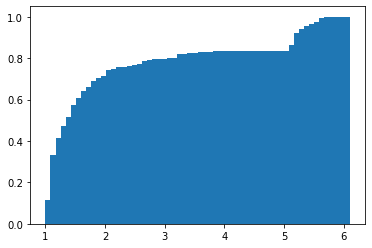

In [76]:
_ = plt.hist([value/sorted_timings[0][1] for value in timings.values()], bins=60, cumulative=True, density=True)

Regardless, only using the permutations of the digits is still doing considerably worse than using nested loops.

# Recursion

The code with the nested loops is quite fast, but quite ugly, we can get a nicer implementation using recursion.

We define two helper function to make the code easier to understand.  The first function returns the number of digits of an integer (note that it will fail for 0 and 1 as input).  The second checks whether a number has all distinct digits.

In [35]:
def number_of_digits(number):
    return math.ceil(math.log10(number))

In [36]:
def has_distinct_digits(number):
    return len(set(str(number))) == number_of_digits(number)

Now the recursive implementation is straightforward.

In [37]:
def find_number_recursive(number=None):
    if number is None:
        # this is the first digit a
        for digit in range(1, 10):
            if result := find_number_recursive(digit):
                return result
    elif number_of_digits(number) < 9:
        # all digits up to h
        for digit in range(1, 10):
            new_number = digit + 10*number
            if new_number % number_of_digits(new_number) == 0 and (result := find_number_recursive(new_number)):
                return result
    elif has_distinct_digits(number):
        # 9 digits, all distinct
        return number

In [38]:
find_number_recursive()

381654729

In [39]:
%timeit find_number_recursive()

1.45 ms ± 24 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Inlining

The performance is not as good as the implementation using nested loops, but eliminating the function calls improves performance.

In [40]:
def find_number_recursive_inline(number=None):
    if number is None:
        # this is the first digit a
        for digit in range(1, 10):
            if result := find_number_recursive_inline(digit):
                return result
    elif math.ceil(math.log10(number)) < 9:
        # all digits up to h
        for digit in range(1, 10):
            new_number = digit + 10*number
            if new_number % math.ceil(math.log10(new_number)) == 0 and (result := find_number_recursive_inline(new_number)):
                return result
    elif has_distinct_digits(number):
        # 9 digits, all distinct
        return number

In [41]:
find_number_recursive_inline()

381654729

In [42]:
%timeit find_number_recursive_inline()

1.26 ms ± 19.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Although slower than the nested loop implementation, the recursive implementation is much more elegant.

# No logs

In [43]:
def find_number_recursive_no_log(number=None, nr_digits=0):
    if nr_digits == 0:
        for digit in range(1, 10):
            if result := find_number_recursive_no_log(digit, 1):
                return result
    elif nr_digits < 9:
        for digit in range(1, 10):
            new_number = digit + 10*number
            if new_number % (nr_digits + 1) == 0 and (result := find_number_recursive_no_log(new_number, nr_digits + 1)):
                return result
    elif has_distinct_digits(number):
        # 9 digits, all distinct
        return number

In [44]:
find_number_recursive_no_log()

381654729

In [45]:
%timeit find_number_recursive_no_log()

627 µs ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


This implementation is just a little less efficient than the nested loop implementation, but much more elegant.